## Ex 1
Generate Bernoulli and Binomial random variable sand find expectation using the simulation



In [29]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

n_simulations = 10000 n_trials = 10 p = 0.3 
Bernoulli expectation (simulation): 0.3001
Binomial expectation (simulation): 2.9853


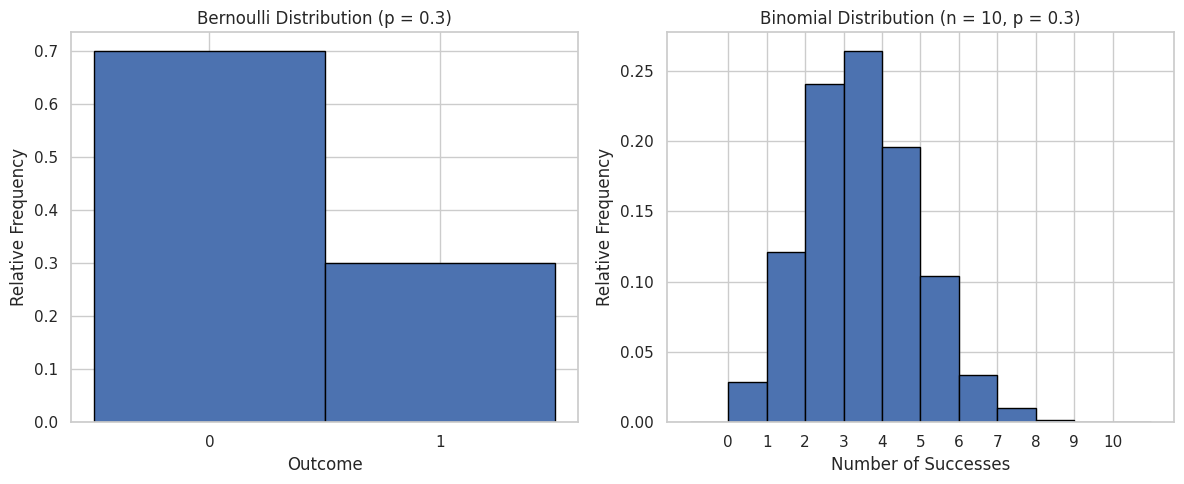

In [13]:
n_simulations = 10000
p = 0.3
n_trials = 10

print(f"n_simulations = 10000 n_trials = 10 p = 0.3 ")
bernSamples = []

for i in range(n_simulations):
    u = random.random()
    if u < p:
      bernSamples.append(1)
    else:
      bernSamples.append(0)


bernExpectation = sum(bernSamples) / n_simulations
print("Bernoulli expectation (simulation):", bernExpectation)


binSamples = []

for i in range(n_simulations):
    successes = 0
    for j in range(n_trials):
        u = random.random()
        if u < p:
            successes += 1
    binSamples.append(successes)

binExpectation = sum(binSamples) / n_simulations
print("Binomial expectation (simulation):", binExpectation)


fig, axes = plt.subplots(1, 2, figsize=(12, 5))


axes[0].hist(bernSamples, bins=[-0.5, 0.5, 1.5], density=True, edgecolor='black')
axes[0].set_xticks([0, 1])
axes[0].set_title("Bernoulli Distribution (p = 0.3)")
axes[0].set_xlabel("Outcome")
axes[0].set_ylabel("Relative Frequency")


bins = list(range(-1, n_trials + 2))
axes[1].hist(binSamples, bins=bins, density=True, edgecolor='black')
axes[1].set_xticks(range(0, n_trials + 1))
axes[1].set_title("Binomial Distribution (n = 10, p = 0.3)")
axes[1].set_xlabel("Number of Successes")
axes[1].set_ylabel("Relative Frequency")

plt.tight_layout()
plt.show()


## Ex 2
Generate Dice and find expectation using the simulation.

Dice expectation (simulation): 3.4829


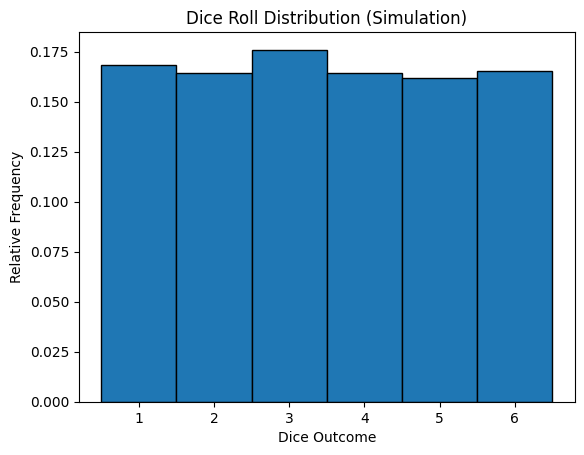

In [ ]:
n_simulations = 10000

dice_outcomes = []
for i in range(n_simulations):
    u = random.uniform(0,1)
    dice_value = int(u * 6) + 1
    dice_outcomes.append(dice_value)


dice_expectation = sum(dice_outcomes) / n_simulations
print("Dice expectation (simulation):", dice_expectation)

plt.hist(dice_outcomes, bins=range(1, 8), density=True, edgecolor='black', align='left')
plt.xticks(range(1, 7))
plt.xlabel("Dice Outcome")
plt.ylabel("Relative Frequency")
plt.title("Dice Roll Distribution (Simulation)")
plt.show()

## Ex 3
Generate exponential random variables using CDF. and find expectation using the simulation.

Exponential expectation (simulation): 0.9914681187137827


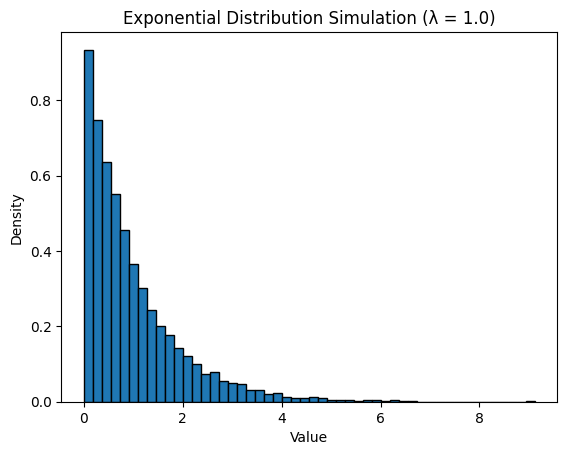

In [ ]:
n_simulations = 10000
lambda_value = 1.0

exponential_samples = []
for i in range(n_simulations):
    u = random.random()
    x = -math.log(u) / lambda_value
    exponential_samples.append(x)


simulated_expectation = sum(exponential_samples) / n_simulations
print("Exponential expectation (simulation):", simulated_expectation)


plt.hist(exponential_samples, bins=50, density=True, edgecolor='black')
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Exponential Distribution Simulation (λ = 1.0)")
plt.show()


## Ex 4
Generate normal random variable and find the expectation using the simulation.

Simulated Normal Expectation (mean): -0.0005449717992451733
Simulated Normal Variance: 1.008036582784566
Theoretical Normal Expectation (mean): 0.0
Theoretical Normal Variance: 1.0


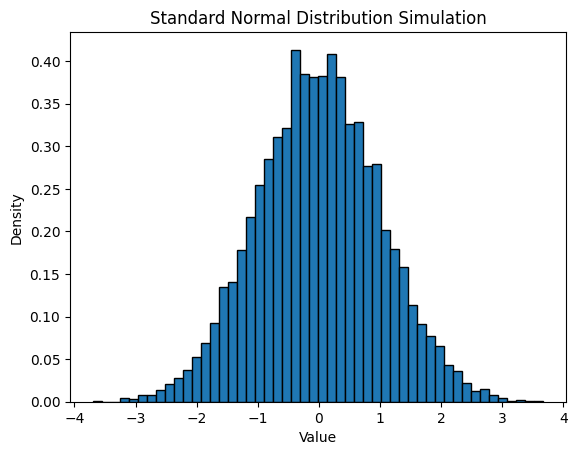

In [ ]:
n_simulations = 10000
normal_samples = []

i = 0
while i < n_simulations:
    u1 = random.random()
    u2 = random.random()

    z1 = math.sqrt(-2 * math.log(u1)) * math.cos(2 * math.pi * u2)
    z2 = math.sqrt(-2 * math.log(u1)) * math.sin(2 * math.pi * u2)

    if i < n_simulations:
        normal_samples.append(z1)
        i += 1
    if i < n_simulations:
        normal_samples.append(z2)
        i += 1


simulated_mean = sum(normal_samples) / len(normal_samples)
simulated_variance = sum((x - simulated_mean) ** 2 for x in normal_samples) / len(normal_samples)

print("Simulated Normal Expectation (mean):", simulated_mean)
print("Simulated Normal Variance:", simulated_variance)

theoretical_mean = 0.0
theoretical_variance = 1.0
print("Theoretical Normal Expectation (mean):", theoretical_mean)
print("Theoretical Normal Variance:", theoretical_variance)


plt.hist(normal_samples, bins=50, density=True, edgecolor='black')
plt.xlabel("Value")
plt.ylabel("Density")
plt.title("Standard Normal Distribution Simulation")
plt.show()


## Ex 5
Generating one and two dimensional random walks and simulate first return time

Plotting the first 10 simulations for 1D random walk:


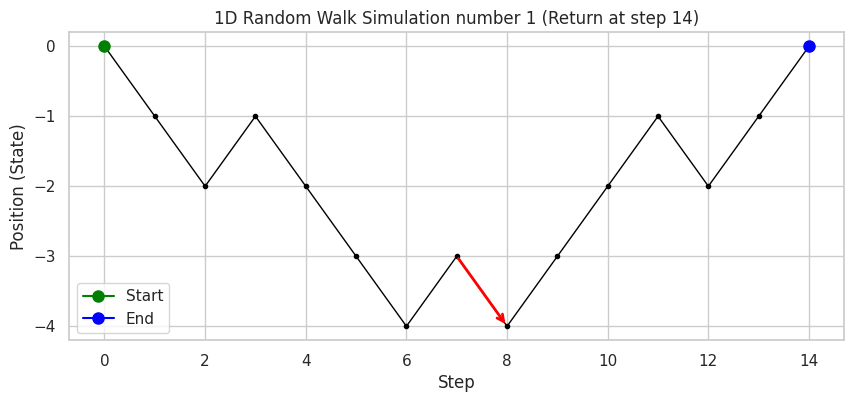

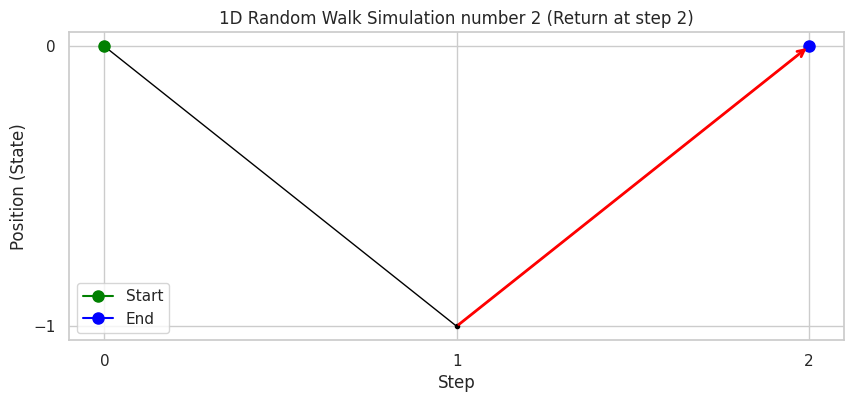

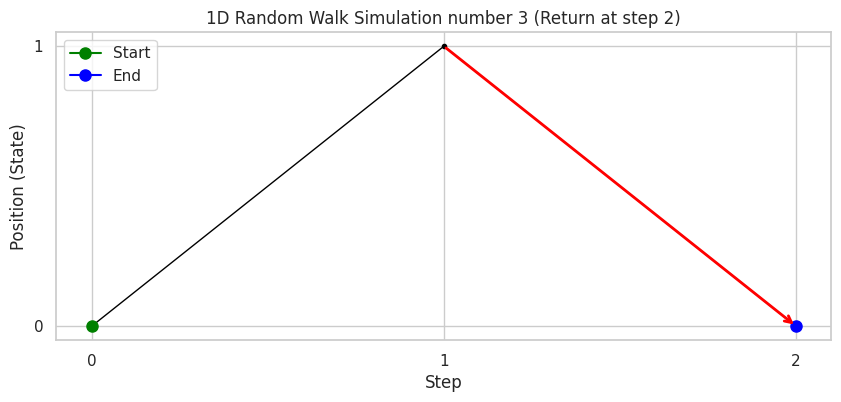

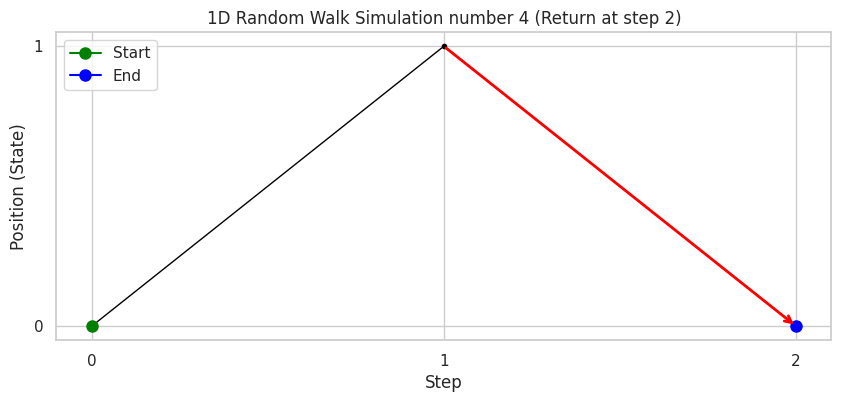

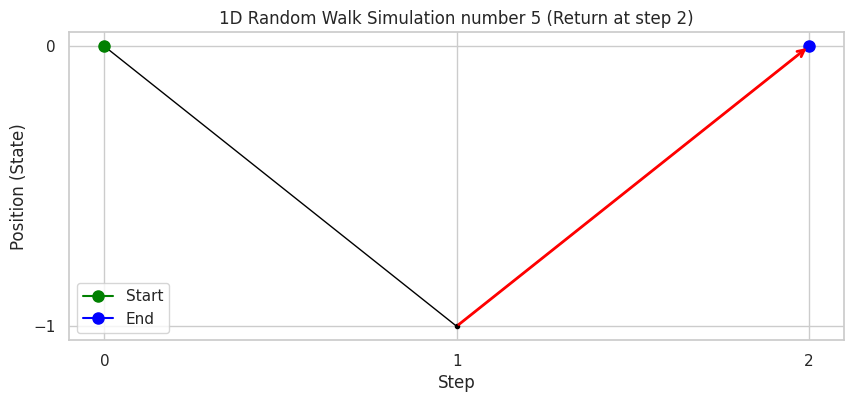

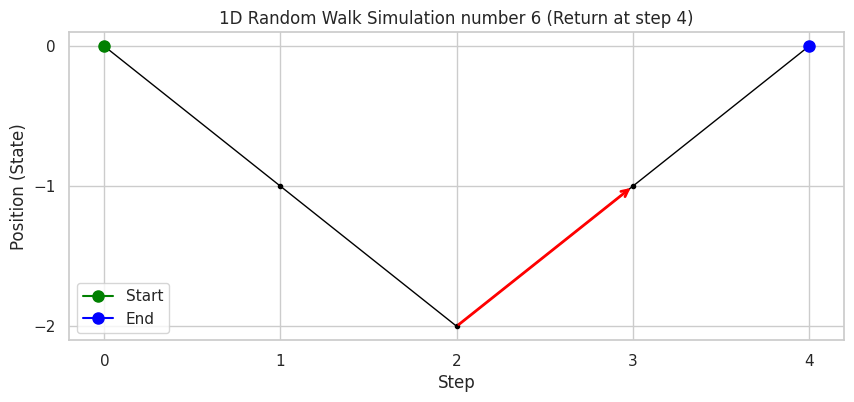

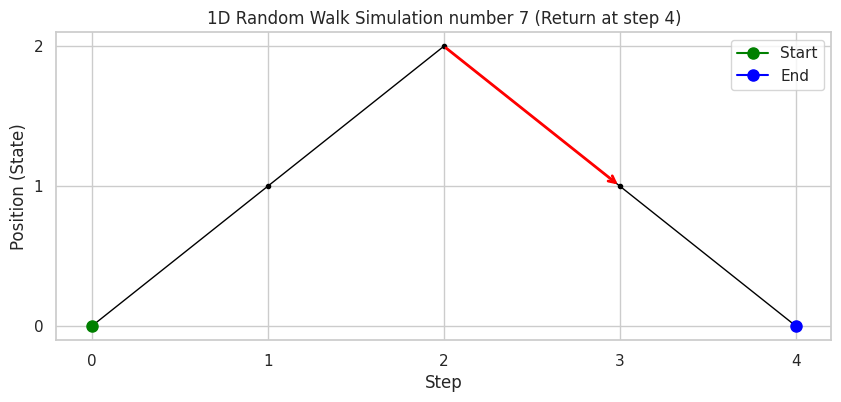

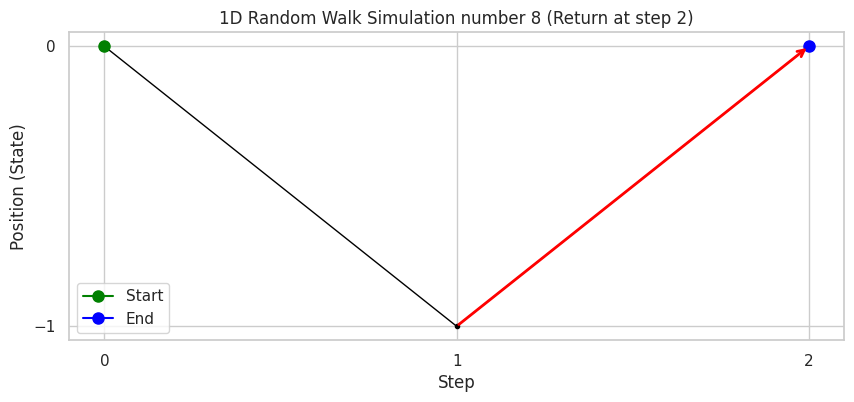

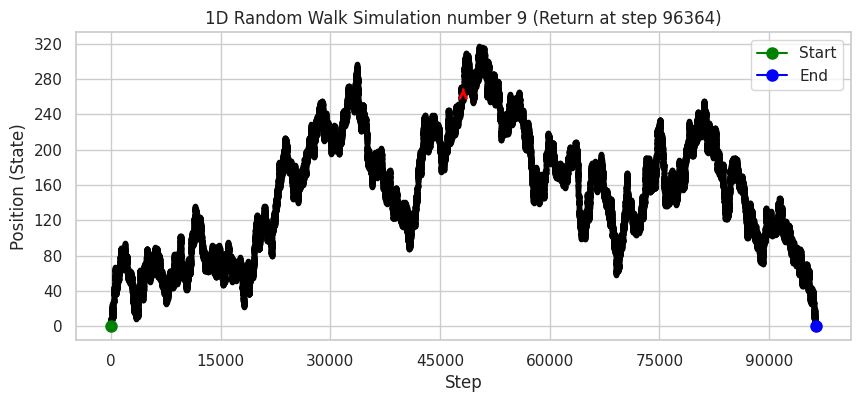

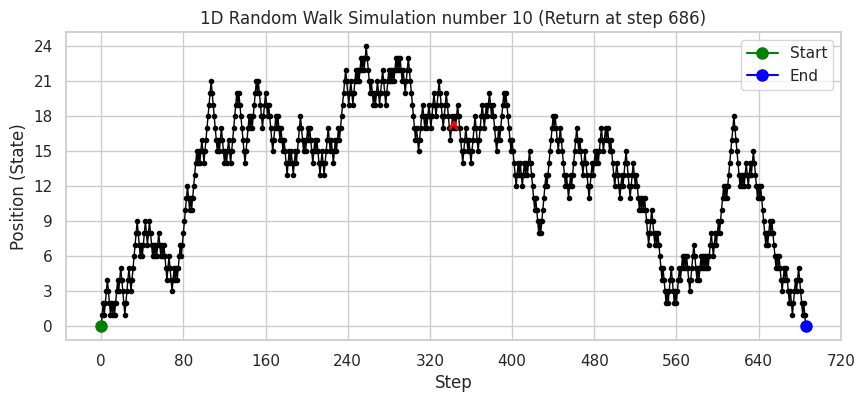

PDF of first return times (in steps):
Return at 2 step(s): 0.536
Return at 4 step(s): 0.144
Return at 6 step(s): 0.082
Return at 8 step(s): 0.031
Return at 10 step(s): 0.010
Return at 14 step(s): 0.021
Return at 16 step(s): 0.010
Return at 18 step(s): 0.010
Return at 22 step(s): 0.010
Return at 48 step(s): 0.010
Return at 52 step(s): 0.010
Return at 56 step(s): 0.021
Return at 58 step(s): 0.010
Return at 62 step(s): 0.010
Return at 64 step(s): 0.010
Return at 74 step(s): 0.010
Return at 94 step(s): 0.010
Return at 98 step(s): 0.010
Return at 182 step(s): 0.010
Return at 388 step(s): 0.010
Return at 458 step(s): 0.010
Return at 526 step(s): 0.010


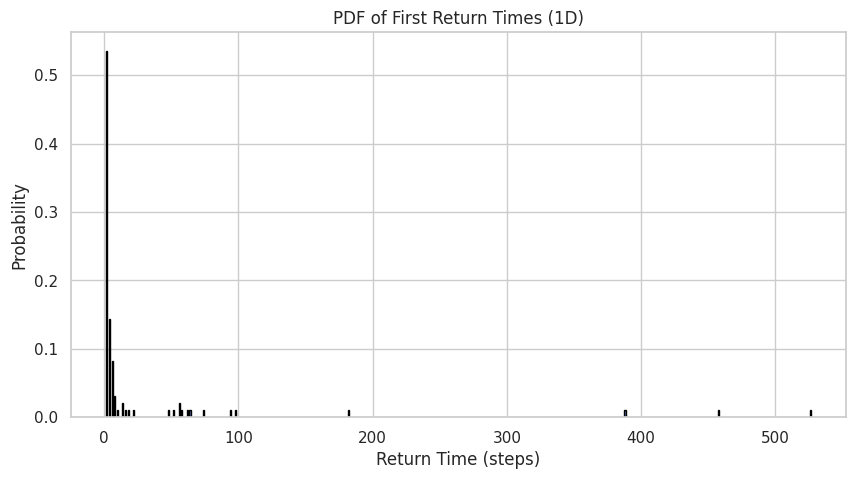

In [20]:
def random_walk_1d(p=0.5, bound=1000):
    position = 0
    positions = [position]
    first_return_time = None
    steps = 0

    while True:
        steps += 1
        move = 1 if random.random() < p else -1
        position += move
        positions.append(position)

        if position == 0:
            first_return_time = steps
            break

        if abs(position) > bound:
            break

    return positions, first_return_time


def plot_walk_1d(positions, title="1D Random Walk"):
    fig, ax = plt.subplots(figsize=(10, 4))
    steps = list(range(len(positions)))
    ax.plot(steps, positions, marker='o', markersize=3, linestyle='-', color='black', linewidth=1)

    ax.plot(0, positions[0], marker='o', markersize=8, color='green', label='Start')
    ax.plot(len(positions)-1, positions[-1], marker='o', markersize=8, color='blue', label='End')

    mid = len(positions) // 2
    if mid < len(positions)-1:
        ax.annotate("", xy=(mid+1, positions[mid+1]), xytext=(mid, positions[mid]),
                    arrowprops=dict(arrowstyle="->", color='red', lw=2))

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    ax.set_xlabel("Step")
    ax.set_ylabel("Position (State)")
    ax.set_title(title)
    ax.grid(True)
    ax.legend()
    plt.show()


def plot_pdf(pdf_dict, title="PDF of First Return Times (1D)", xlabel="Return Time (steps)", ylabel="Probability"):
    keys = sorted(pdf_dict.keys())
    values = [pdf_dict[k] for k in keys]
    plt.figure(figsize=(10, 5))
    plt.bar(keys, values, width=0.8, edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def simulate_multiple_walks(simulation_func, num_simulations=100, **kwargs):
    first_return_times = []
    for i in range(num_simulations):
        i, first_return = simulation_func(**kwargs)
        if first_return is not None and first_return < kwargs.get('bound', float('inf')):
            first_return_times.append(first_return)
    return first_return_times

if __name__ == '__main__':
    bound_1d = 1000
    num_simulations = 100
    p_1d = 0.5

    print("Plotting the first 10 simulations for 1D random walk:")
    for i in range(10):
        positions, ret_time = random_walk_1d(p=p_1d, bound=bound_1d)
        plot_title = f"1D Random Walk Simulation number {i+1} (Return at step {ret_time if ret_time else 'No Return'})"
        plot_walk_1d(positions, title=plot_title)

    all_return_times = simulate_multiple_walks(random_walk_1d, num_simulations=num_simulations, p=p_1d, bound=bound_1d)
    counts = Counter(all_return_times)
    pdf = {k: v/len(all_return_times) for k, v in counts.items()}

    print("PDF of first return times (in steps):")
    for return_time in sorted(pdf.keys()):
        print(f"Return at {return_time} step(s): {pdf[return_time]:.3f}")
    plot_pdf(pdf)


##### NOTE:- In drawing pdf Im considering only those simulation who have return steps less than 1000 for clarity of visualisation

Plotting the first 10 simulations for 2D random walk:


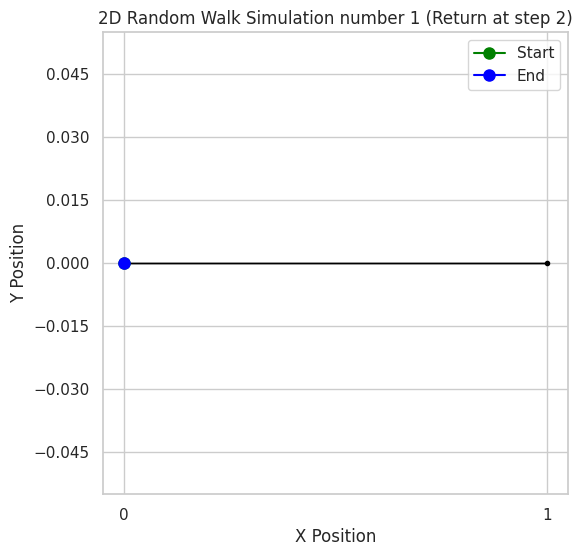

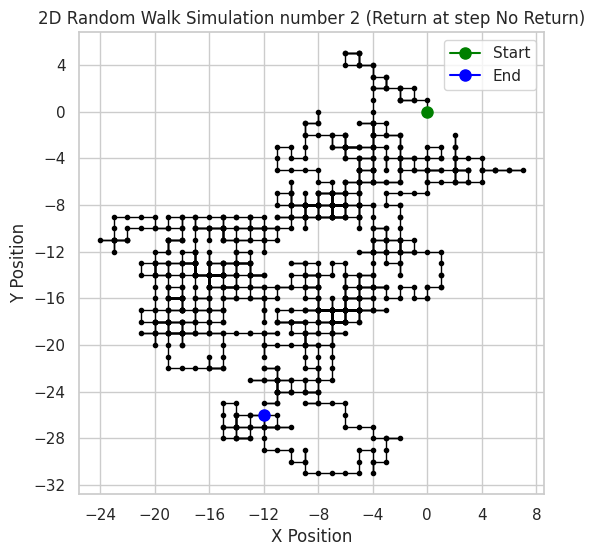

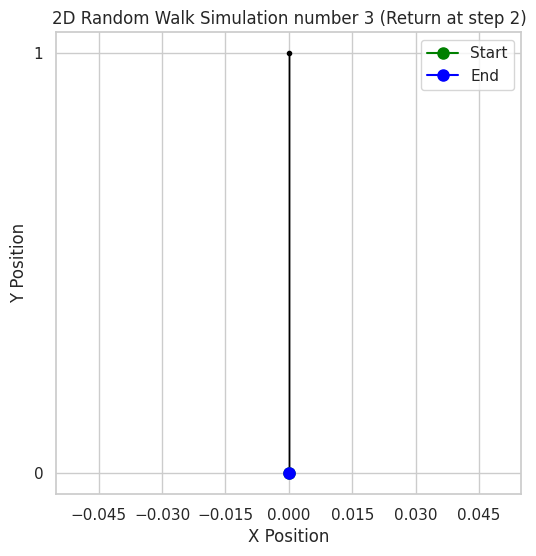

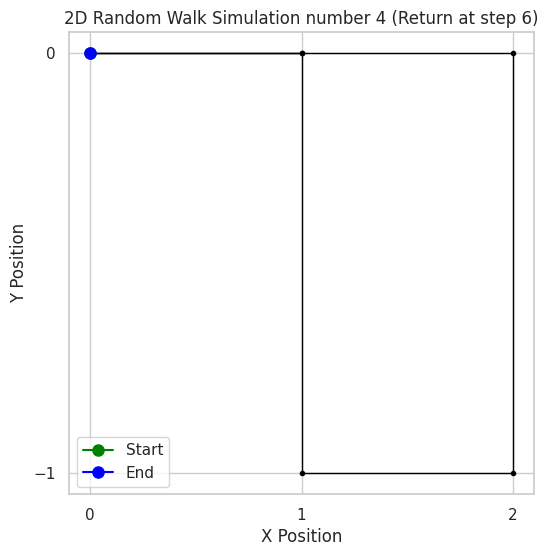

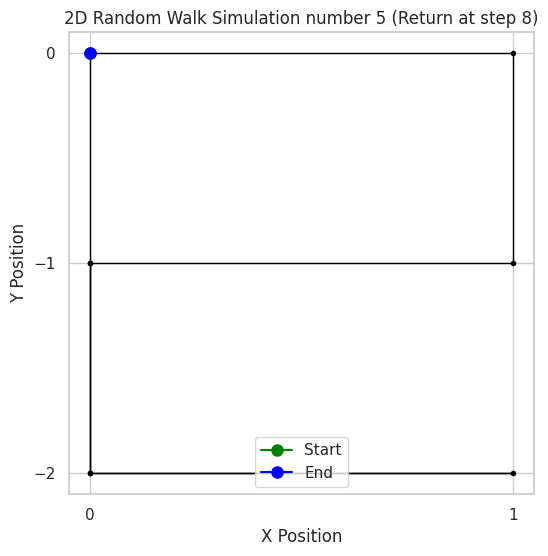

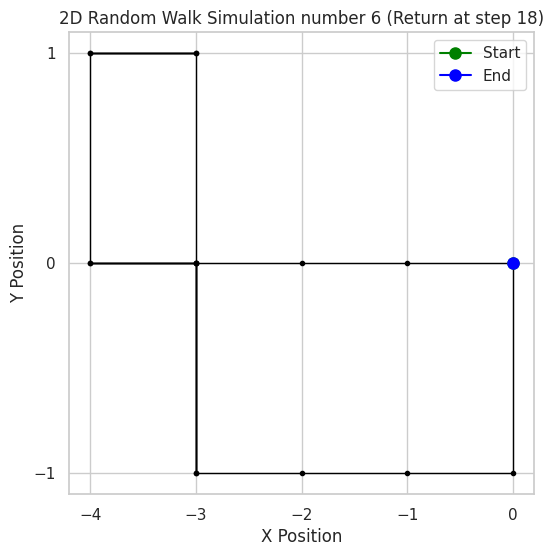

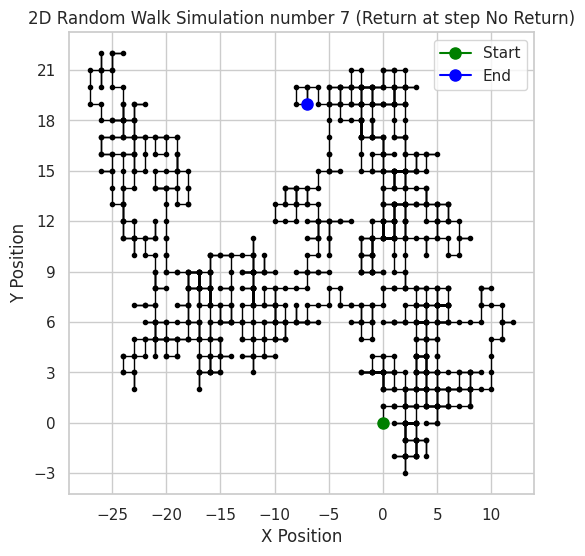

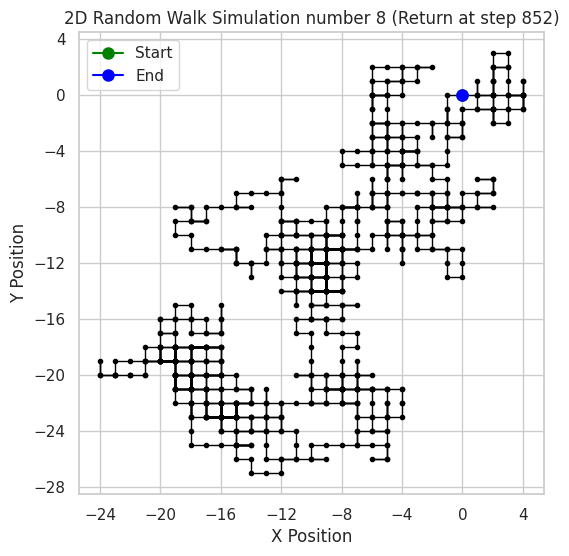

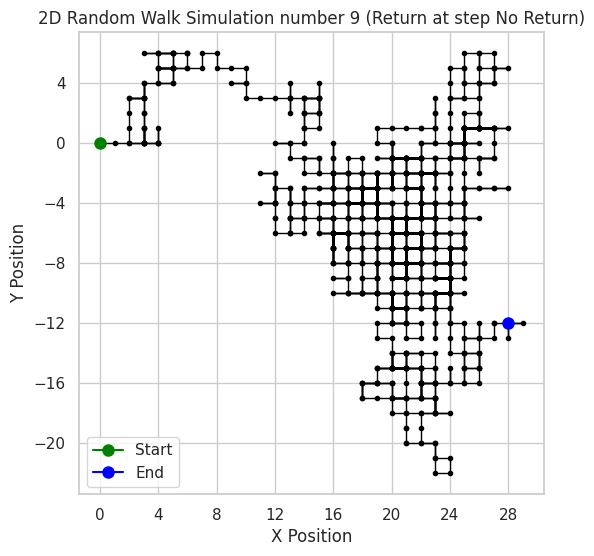

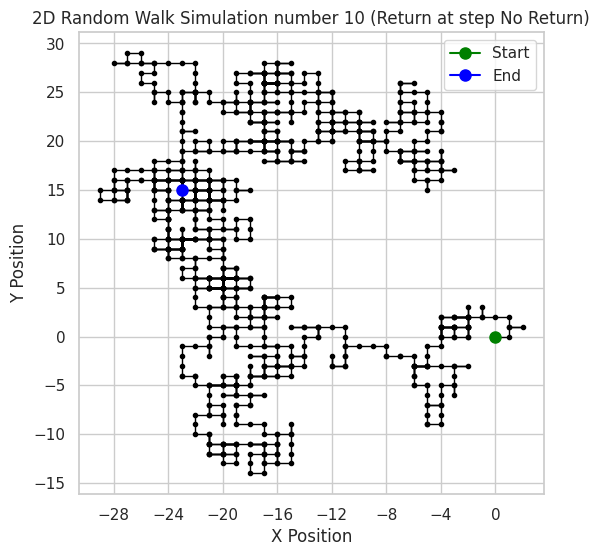

PDF of first return times (in steps):
Return at 2 step(s): 0.403
Return at 4 step(s): 0.149
Return at 6 step(s): 0.060
Return at 8 step(s): 0.030
Return at 12 step(s): 0.045
Return at 14 step(s): 0.015
Return at 16 step(s): 0.015
Return at 18 step(s): 0.015
Return at 22 step(s): 0.015
Return at 24 step(s): 0.015
Return at 36 step(s): 0.015
Return at 42 step(s): 0.015
Return at 62 step(s): 0.015
Return at 90 step(s): 0.015
Return at 92 step(s): 0.015
Return at 104 step(s): 0.015
Return at 130 step(s): 0.015
Return at 166 step(s): 0.015
Return at 194 step(s): 0.015
Return at 202 step(s): 0.015
Return at 244 step(s): 0.015
Return at 378 step(s): 0.015
Return at 390 step(s): 0.015
Return at 576 step(s): 0.015
Return at 740 step(s): 0.015
Return at 842 step(s): 0.015


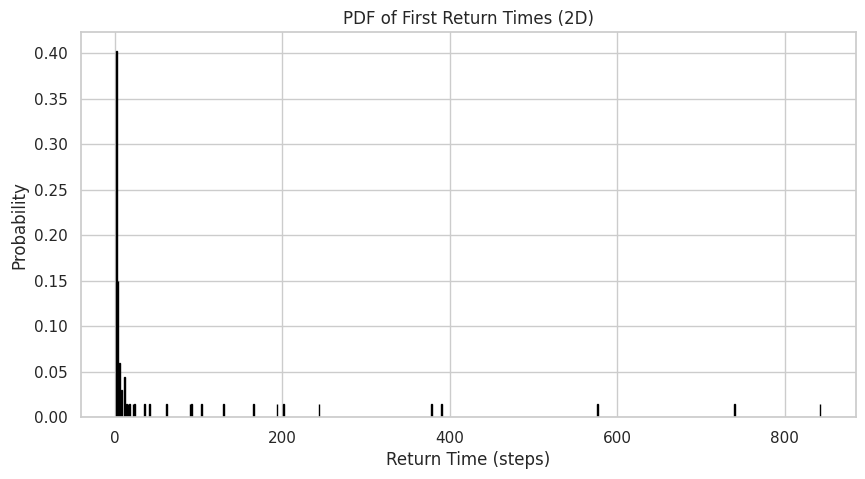

In [28]:
def random_walk_2d(bound=1000, max_steps=1000):
    position = (0, 0)
    positions = [position]
    first_return_time = None
    steps = 0

    moves = [(1, 0), (-1, 0), (0, 1), (0, -1)]

    while steps < max_steps:
        steps += 1
        move = random.choice(moves)
        position = (position[0] + move[0], position[1] + move[1])
        positions.append(position)

        if position == (0, 0):
            first_return_time = steps
            break

        if abs(position[0]) > bound or abs(position[1]) > bound:
            break

    return positions, first_return_time


def plot_walk_2d(positions, title="2D Random Walk"):
    fig, ax = plt.subplots(figsize=(6, 6))
    x_vals, y_vals = zip(*positions)
    ax.plot(x_vals, y_vals, marker='o', markersize=3, linestyle='-', color='black', linewidth=1)

    ax.plot(0, 0, marker='o', markersize=8, color='green', label='Start')
    ax.plot(x_vals[-1], y_vals[-1], marker='o', markersize=8, color='blue', label='End')

    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    ax.set_xlabel("X Position")
    ax.set_ylabel("Y Position")
    ax.set_title(title)
    ax.grid(True)
    ax.legend()
    plt.show()


def plot_pdf(pdf_dict, title="PDF of First Return Times (2D)", xlabel="Return Time (steps)", ylabel="Probability"):
    keys = sorted(pdf_dict.keys())
    values = [pdf_dict[k] for k in keys]
    plt.figure(figsize=(10, 5))
    plt.bar(keys, values, width=0.8, edgecolor='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.show()

def simulate_multiple_walks(simulation_func, num_simulations=100, **kwargs):
    first_return_times = []
    for i in range(num_simulations):
        i, first_return = simulation_func(**kwargs)
        if first_return is not None and first_return < kwargs.get('max_steps', float('inf')):
            first_return_times.append(first_return)
    return first_return_times

if __name__ == '__main__':
    bound_2d = 1000
    max_steps = 1000
    num_simulations = 100

    print("Plotting the first 10 simulations for 2D random walk:")
    for i in range(10):
        positions, ret_time = random_walk_2d(bound=bound_2d, max_steps=max_steps)
        plot_title = f"2D Random Walk Simulation number {i+1} (Return at step {ret_time if ret_time else 'No Return'})"
        plot_walk_2d(positions, title=plot_title)

    all_return_times = simulate_multiple_walks(random_walk_2d, num_simulations=num_simulations, bound=bound_2d, max_steps=max_steps)
    counts = Counter(all_return_times)
    pdf = {k: v/len(all_return_times) for k, v in counts.items()}

    print("PDF of first return times (in steps):")
    for return_time in sorted(pdf.keys()):
        print(f"Return at {return_time} step(s): {pdf[return_time]:.3f}")
    plot_pdf(pdf)


##### NOTE:- For better visualisation In the simulation I'm considering max step size to be 1000 and after that I'm marking it as no return, also it should be noted that whenever return happens then start and end point overlap and only BLUE marker is shown represent returning at starting point (0,0), However this could be changed by editing code.